## Planing

Sell NZD/USD

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

import fxcmpy
con = fxcmpy.fxcmpy(config_file = '/Users/ballmdr/blockchain-python/FXCM/fxcm.cfg')

In [68]:
#symbols = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CAD', 'USD/CHF', 'AUD/USD', 'NZD/USD']
symbols = con.get_instruments()
df = dict()
last_price = dict()
for symbol in symbols:
    df[symbol] = con.get_candles(symbol, period='D1', number=175)
    df[symbol]['Close'] = (df[symbol]['bidclose'] + df[symbol]['askclose'])/2
    last_price[symbol] = (df[symbol].iloc[-1]['Close'])

In [64]:
plotly.tools.set_credentials_file(username='ballmdr', api_key='oSgf6vHed7evuaiXDdBb')

In [4]:
def getDateRange(df='', fromdate='', todate=''):

    mask = (df['Datetime'] > fromdate) & (df['Datetime'] <= todate)
    return df.loc[mask]

df = dict()
for symbol in symbols:
    path = '/Users/ballmdr/Documents/data/' + symbol + '_M1_2012_2019.csv'
    df[symbol] = pd.read_csv(path, names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df[symbol]['Datetime'] = pd.to_datetime(df[symbol]['Date'] + ' ' + df[symbol]['Time'], format='%Y.%m.%d %H:%M')
    df[symbol].index = df[symbol]['Datetime']
    df[symbol].drop(['Date', 'Time'], axis=1, inplace=True)
    df[symbol]['Open'] = df[symbol]['Open'].round(5)
    df[symbol]['High'] = df[symbol]['High'].round(5)
    df[symbol]['Low'] = df[symbol]['Low'].round(5)
    df[symbol]['Close'] = df[symbol]['Close'].round(5)

In [7]:
df['EUR/USD'].head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close
date,,,,,,,,,,
2016-09-02 21:00:00,1.11956,1.11513,1.12519,1.11497,1.11979,1.11576,1.12533,1.11509,285462,1.115445
2016-09-04 21:00:00,1.11513,1.11555,1.11556,1.11442,1.11576,1.11594,1.11628,1.11476,189,1.115745
2016-09-05 21:00:00,1.11555,1.11457,1.11817,1.11385,1.11594,1.11484,1.11832,1.11398,154741,1.114705
2016-09-06 21:00:00,1.11457,1.12531,1.12624,1.11395,1.11484,1.12573,1.12638,1.11406,232818,1.125520
2016-09-07 21:00:00,1.12531,1.12380,1.12713,1.12281,1.12573,1.12398,1.12727,1.12294,211134,1.123890


fromdate = datetime(2018, 10, 1)
todate = datetime(2018, 12, 31)
newdf = dict()
for symbol in symbols:
    newdf[symbol] = getDateRange(df[symbol], fromdate, todate)

In [70]:
newdf = df

In [15]:
def z(df):
    return (df - df.mean()) / df.std()

In [71]:
df_z = dict()
for symbol in symbols:
    newdf[symbol]['Close_z'] = z(newdf[symbol]['Close'])

In [72]:
newdf['USD/JPY'].head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,Close,Close_z
date,,,,,,,,,,,
2018-07-19 21:00:00,112.829,112.456,113.170,112.058,112.850,112.482,113.184,112.070,313821,112.4690,0.539350
2018-07-20 21:00:00,112.456,111.416,112.617,111.376,112.482,111.486,112.630,111.393,395510,111.4510,-0.106749
2018-07-22 21:00:00,111.416,111.374,111.386,111.159,111.486,111.401,111.407,111.191,563,111.3875,-0.147051
2018-07-23 21:00:00,111.374,111.332,111.538,110.746,111.401,111.355,111.551,110.759,306919,111.3435,-0.174976
2018-07-24 21:00:00,111.332,111.185,111.508,110.955,111.355,111.205,111.521,110.967,270483,111.1950,-0.269225


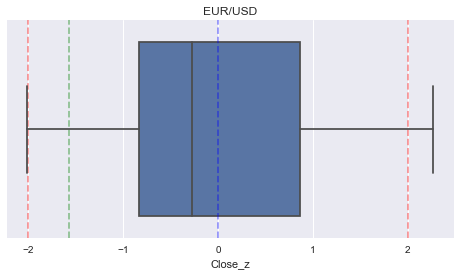

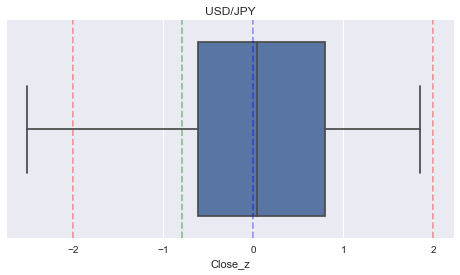

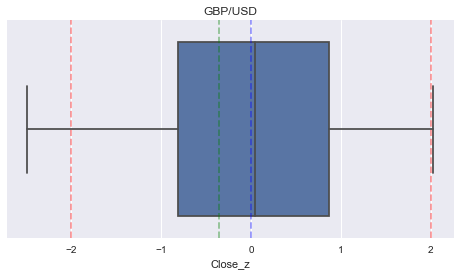

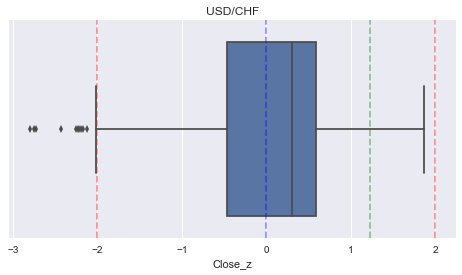

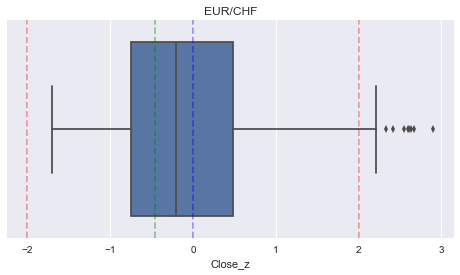

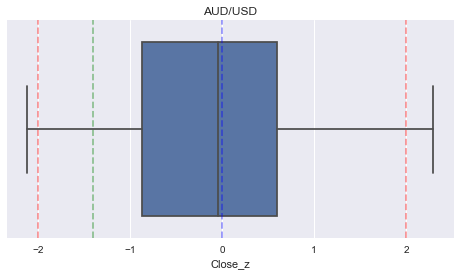

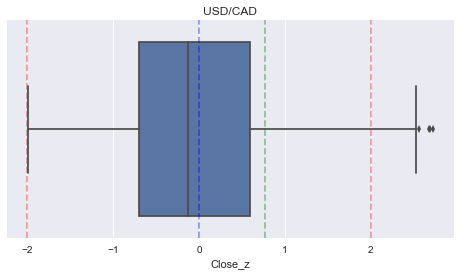

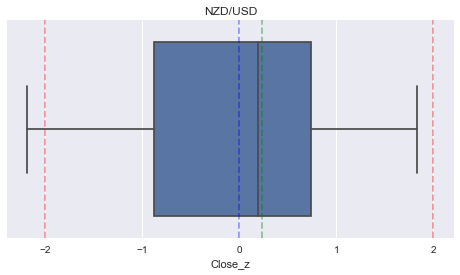

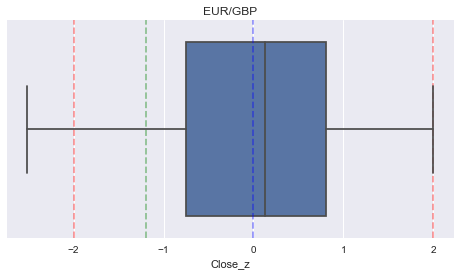

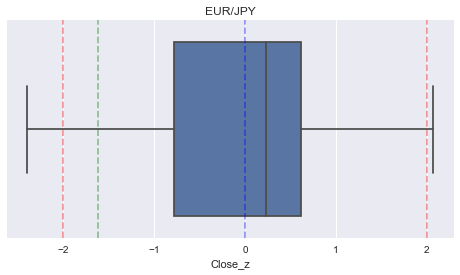

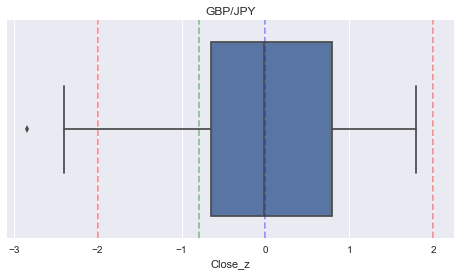

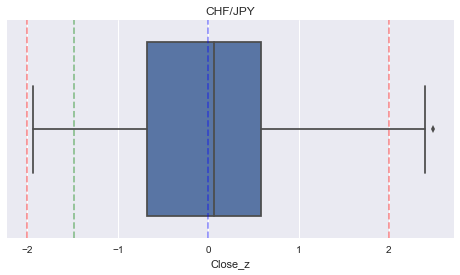

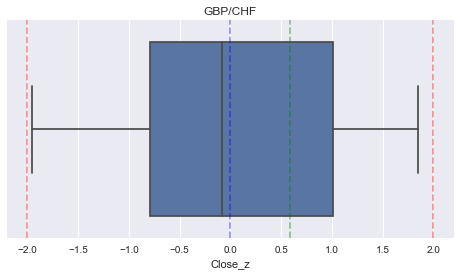

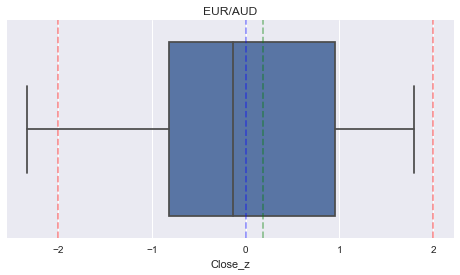

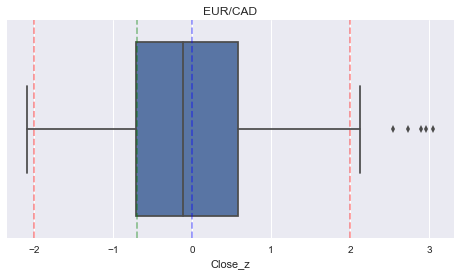

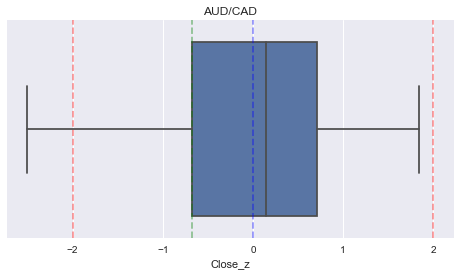

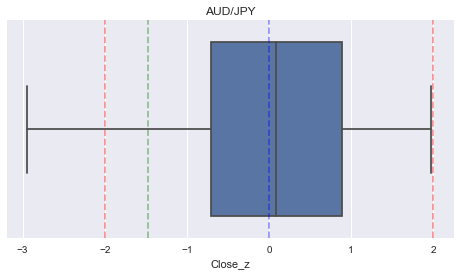

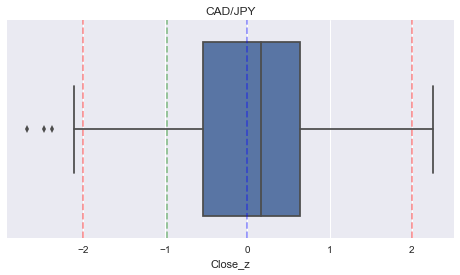

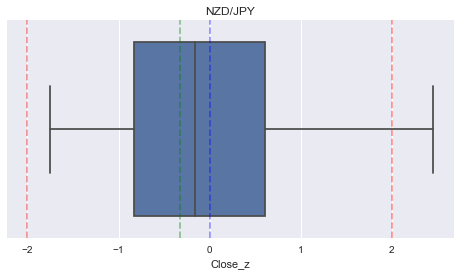

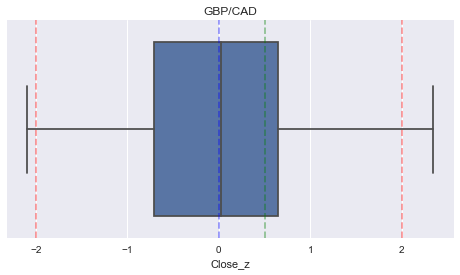

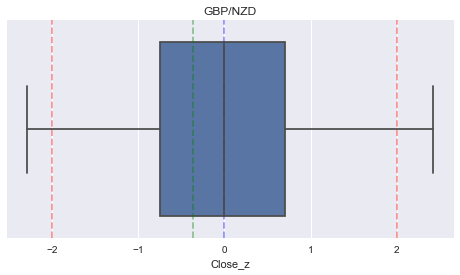

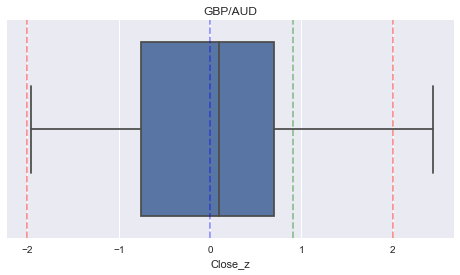

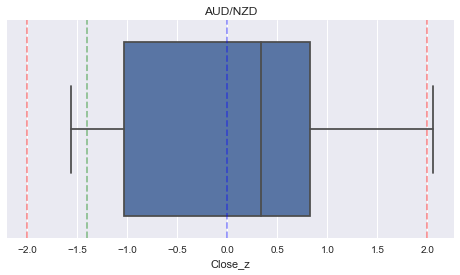

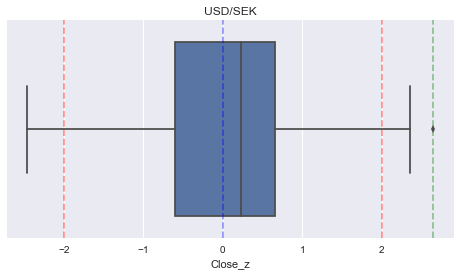

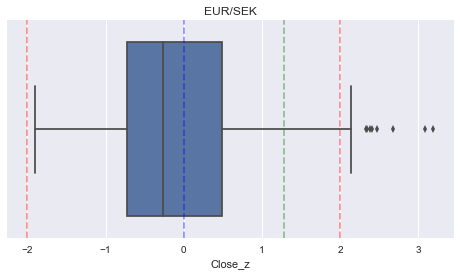

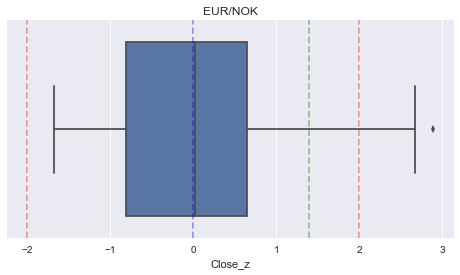

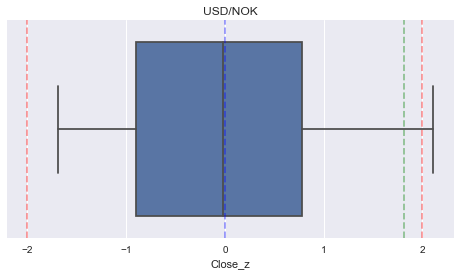

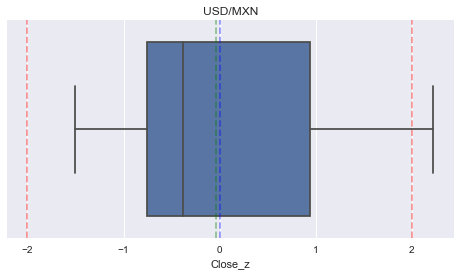

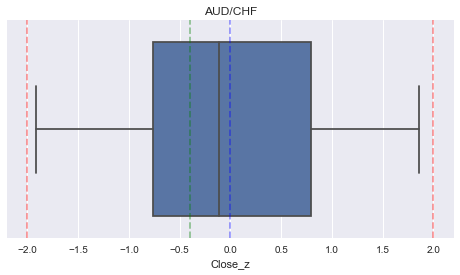

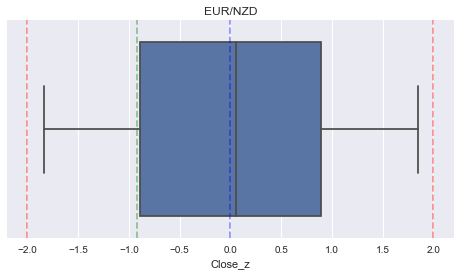

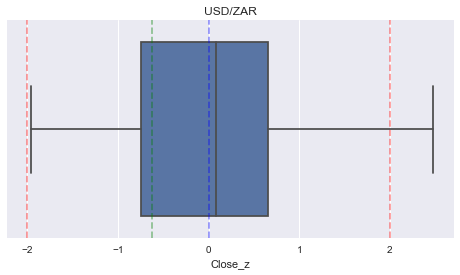

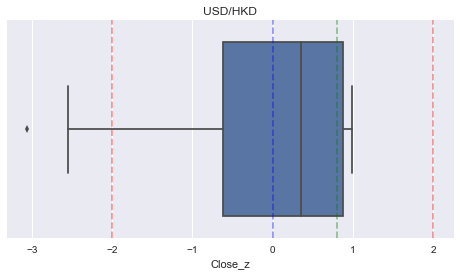

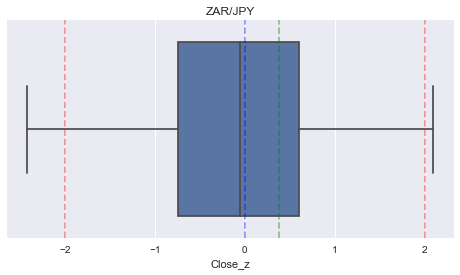

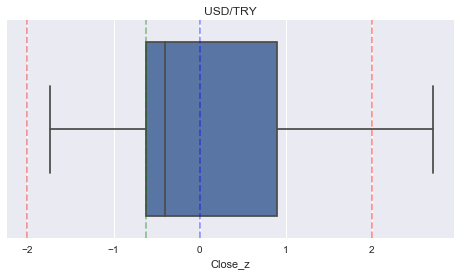

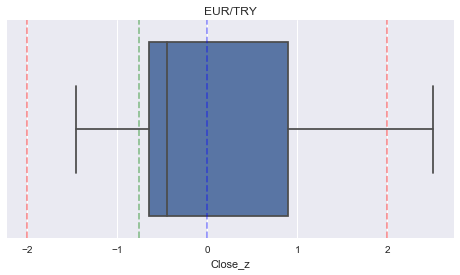

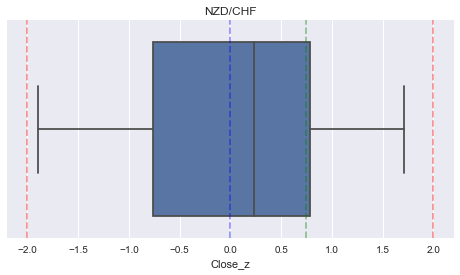

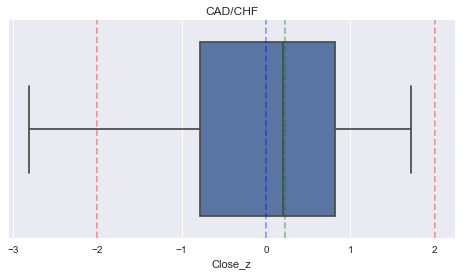

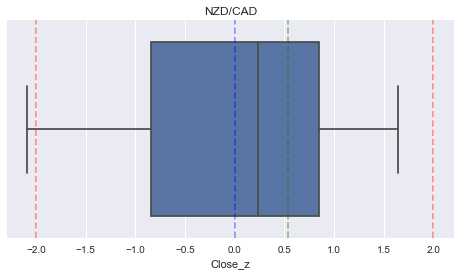

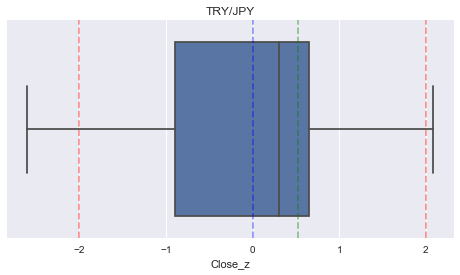

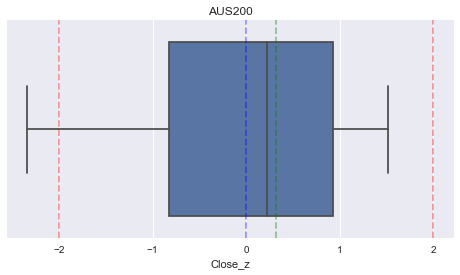

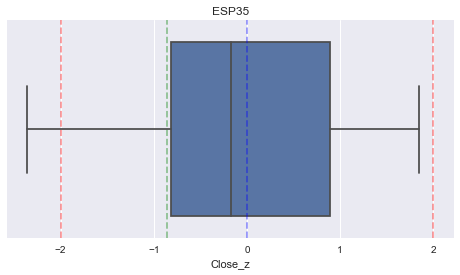

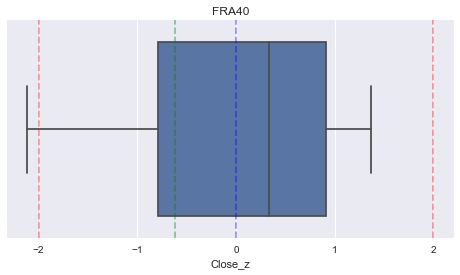

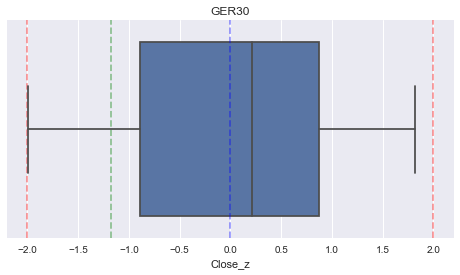

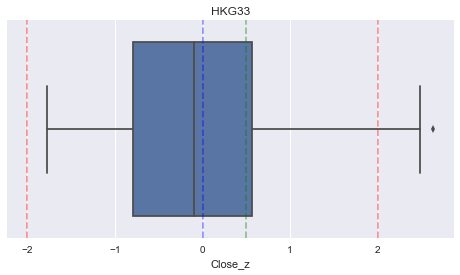

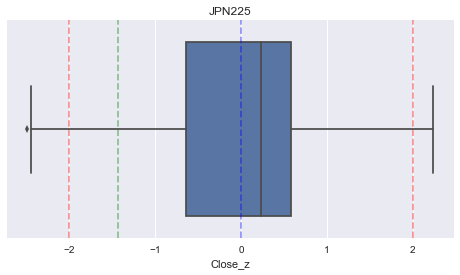

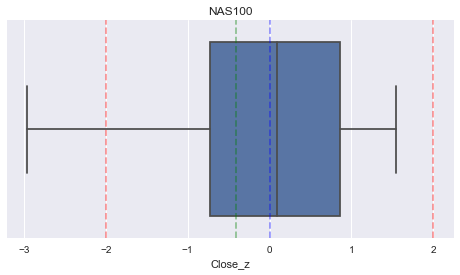

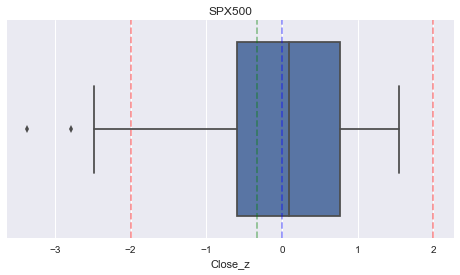

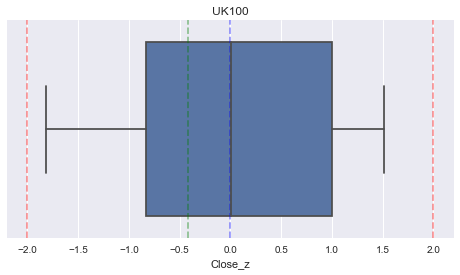

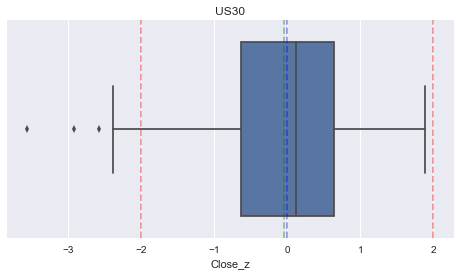

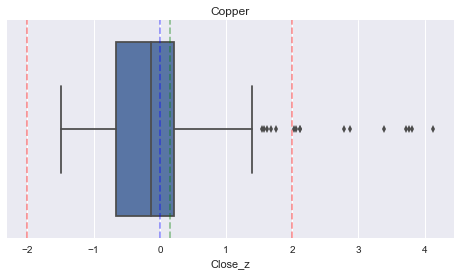

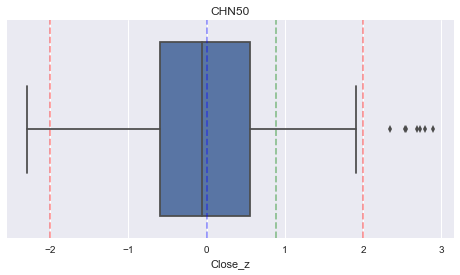

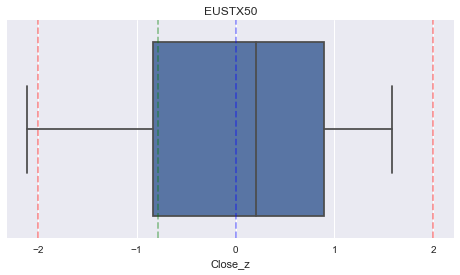

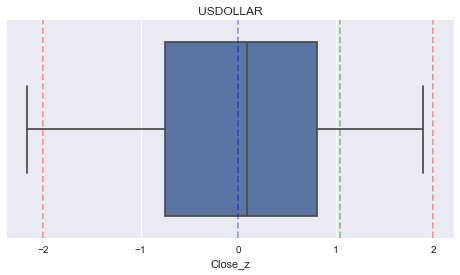

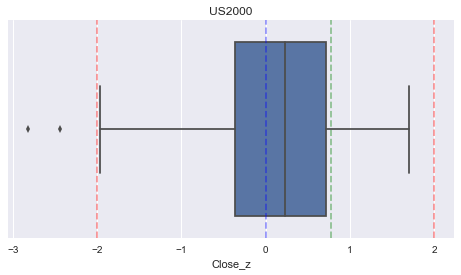

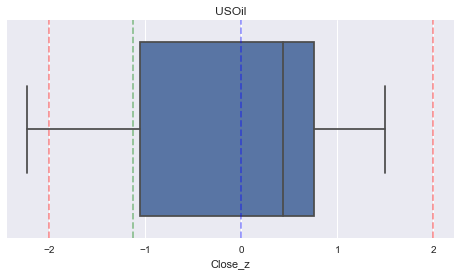

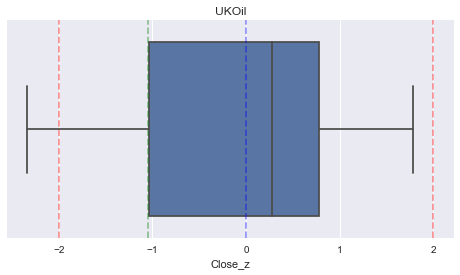

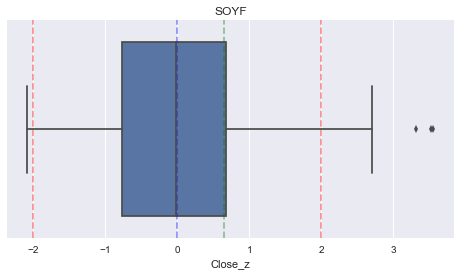

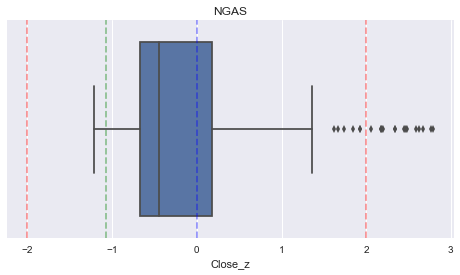

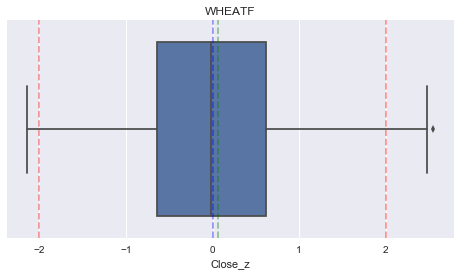

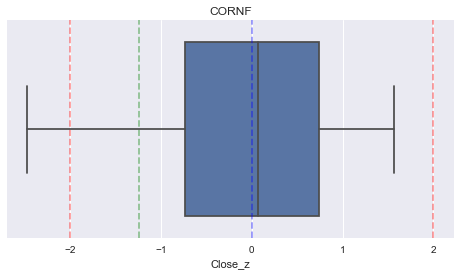

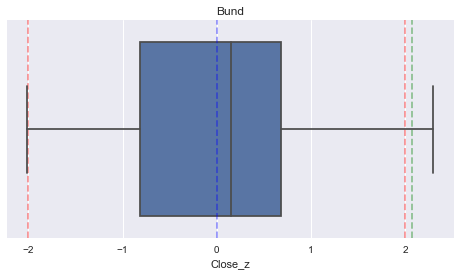

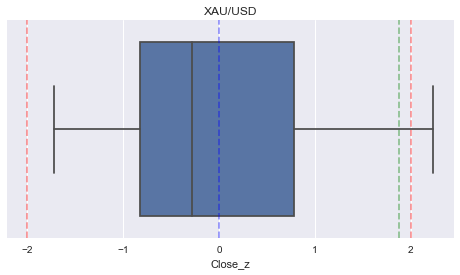

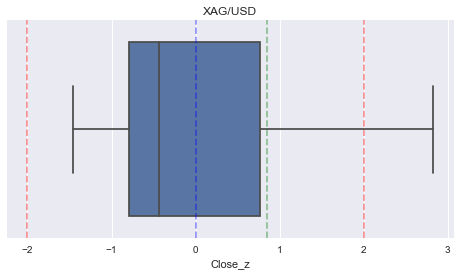

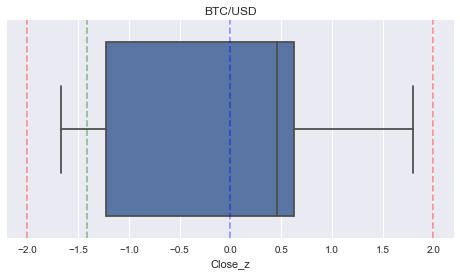

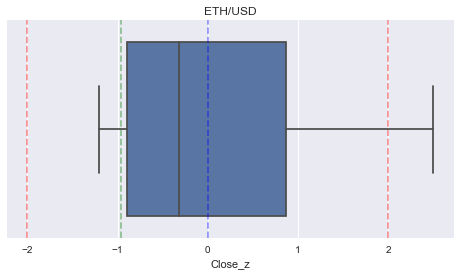

In [73]:

for symbol in symbols:
    plt.figure(figsize=(8,4))
    plt.title(symbol)
    plt.axvline(x=newdf[symbol].iloc[-1]['Close_z'], label='current price', color='green', linestyle='--', alpha=0.4)
    plt.axvline(x=0, color='blue', linestyle='--', label='Mean', alpha=0.4)
    plt.axvline(x=2, color='red', linestyle='--', label='STD', alpha=0.4)
    plt.axvline(x=-2, color='red', linestyle='--', alpha=0.4)
    #sns.kdeplot(newdf[symbol]['Close_z'], shade=True, bw=.05);
    sns.boxplot(newdf[symbol]['Close_z'])
    #sns.distplot(newdf[symbol]['Close_z'])
    plt.show()
    #plt.plot(newdf[symbol]['Close_z'], label=symbol)
    

        

In [83]:
symbol_focus = 'GBP/JPY'
mean = np.mean(newdf[symbol_focus]['Close'])
sd = np.std(newdf[symbol_focus]['Close']) * 3
tripplesd = sd + mean
tripplesd2 = mean - sd
fig = {
    'data': [{
        'type': 'box',
        'y': newdf[symbol_focus]['Close'],
        'box': { 'visible': True },
        'line': { 'color': 'black' },
        'meanline': { 'visible': True },
        'fillcolor': '#8dd3c7',
        'opacity': 0.6,
        'x0': symbol_focus
    }],
    'layout': {
        'title': symbol_focus,
        'yaxis': { 'zeroline': False },
        'shapes': [
            # Line Horizontal
            {
                'type': 'line',
                'opacity': 0.7,
                'x0': 0.5,
                'y0': last_price[symbol_focus],
                'x1': 1,
                'y1': last_price[symbol_focus],
                'line': {
                    'color': 'rgb(50, 171, 96)',
                    'width': 4,
                    'dash': 'dashdot',
                },
            },
            {
                'type': 'line',
                'opacity': 0.7,
                'x0': 0.5,
                'y0': tripplesd,
                'x1': 1,
                'y1': tripplesd,
                'line': {
                    'color': 'red',
                    'width': 4,
                    'dash': 'dashdot',
                },
            },
            {
                'type': 'line',
                'opacity': 0.7,
                'x0': 0.5,
                'y0': tripplesd2,
                'x1': 1,
                'y1': tripplesd2,
                'line': {
                    'color': 'red',
                    'width': 4,
                    'dash': 'dashdot',
                },
            }
        ]
    }
}
py.iplot(fig, filename = 'box', validate = False)

C:\Users\ballmdr\Anaconda3\envs\quant\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

